# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# importing and exploring the dataset

In [2]:
df = pd.read_csv('startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


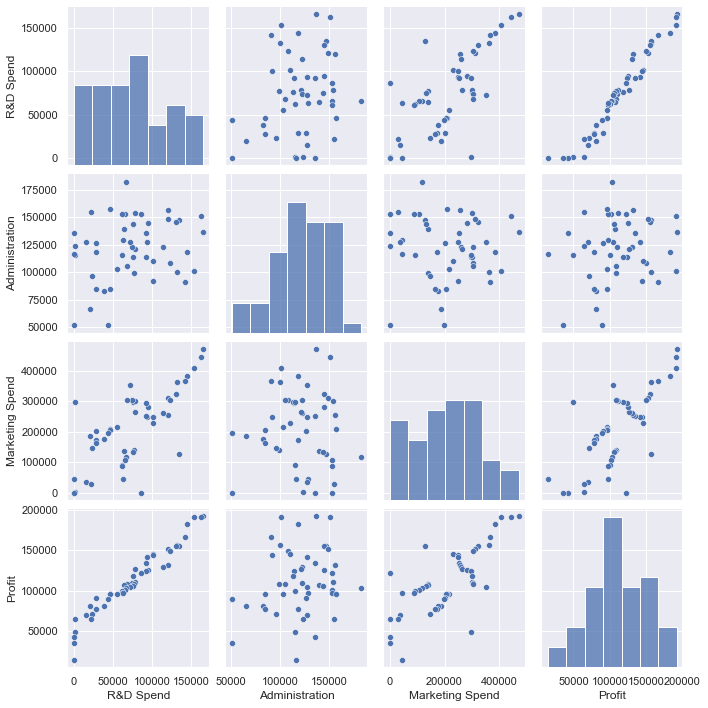

In [4]:
sns.pairplot(df)

<AxesSubplot:>

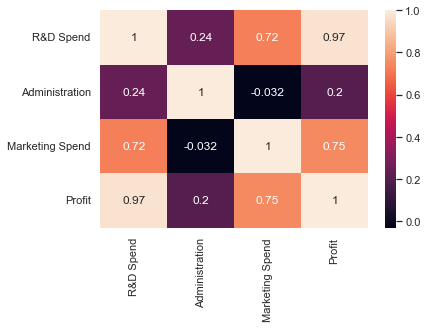

In [23]:
sns.heatmap(df.corr(), annot=True)

# splitting the data

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Encodeing the state column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [8]:
X = np.array(ct.fit_transform(X))

In [9]:
X


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [12]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# the model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [16]:
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(X_test)

In [18]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230166,  67851.69209676,  98791.73374686,
       113969.43533013, 167921.06569551])

In [19]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [34]:
reg.coef_

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [35]:
reg.intercept_

42467.52924854249

# model evaluation

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
print(r2_score(y_test,y_pred))

0.9347068473282303


In [26]:
print(mean_absolute_error(y_test, y_pred))

7514.2936596413765


In [27]:
print(mean_squared_error(y_test, y_pred))

83502864.03259295


In [31]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9137.990152795797


In [32]:
np.mean(y_test)

122277.407

In [33]:
y.mean()

112012.63920000002

# thank you!